In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *
from pathlib import Path

In [3]:
import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [4]:
#Loading the data
DATA = untar_data(URLs.PETS)
path = Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:
#Simple function to get correct labels
#Pets stored as name_number.jpg
#removing number and .jpg
def pet_label_func(fn):
    x_split = fn.split("_")
    if len(x_split) == 2:
        return x_split[0]
    else:
        label = ""
        for i in range(len(x_split) - 2):
            label += x_split[i] + " "
        label += x_split[-2]
        return label

In [6]:
batch_tfms = [Contrast(), Dihedral(), Warp(), Flip(), Brightness(), Rotate(max_deg=45), Saturation(),
            Zoom(), RandomErasing(), Normalize.from_stats(*imagenet_stats)]

In [7]:
csv_list = []
for i in range(len(batch_tfms)):
    dls = ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2,
        label_func=pet_label_func, item_tfms=[Resize(128, method='crop')], batch_tfms = batch_tfms[0:len(batch_tfms)])
    
    model = vision_learner(dls, 'resnet26', metrics=error_rate, cbs=CSVLogger())
    model.fine_tune(10)
    csv = model.csv_logger.read_log() 
    csv_list.append(csv)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26-9aa10e23.pth" to /root/.cache/torch/hub/checkpoints/resnet26-9aa10e23.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.676041,0.906827,0.267253,00:49


epoch,train_loss,valid_loss,error_rate,time
0,1.757993,0.675314,0.212449,00:49
1,1.592550,0.643238,0.201624,00:47
2,1.419605,0.675990,0.215832,00:48
3,1.391027,0.560359,0.176590,00:47
4,1.209493,0.582442,0.186739,00:48
5,1.149155,0.520061,0.171177,00:47
6,1.088946,0.487193,0.160352,00:49
7,1.053420,0.461050,0.148850,00:47
8,0.950801,0.525527,0.168471,00:48
9,0.910039,0.510412,0.167118,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.723401,0.991741,0.294317,00:47


epoch,train_loss,valid_loss,error_rate,time
0,1.739156,0.699647,0.219892,00:48
1,1.573215,0.722201,0.224628,00:48
2,1.491318,0.637647,0.196888,00:47
3,1.309393,0.589741,0.193505,00:48
4,1.176494,0.565444,0.181326,00:47
5,1.098966,0.520964,0.168471,00:48
6,1.050844,0.468552,0.145467,00:47
7,0.913754,0.464636,0.147497,00:48
8,0.902644,0.473106,0.147497,00:48
9,0.892980,0.466224,0.148850,00:48


epoch,train_loss,valid_loss,error_rate,time
0,2.713183,0.904192,0.275372,00:47


epoch,train_loss,valid_loss,error_rate,time
0,1.800838,0.684884,0.214479,00:49
1,1.684594,0.491731,0.148850,00:48
2,1.517130,0.533222,0.167794,00:48
3,1.373498,0.455654,0.156969,00:47
4,1.220186,0.422223,0.140731,00:47
5,1.087918,0.455606,0.150880,00:47
6,1.026489,0.404208,0.134641,00:48
7,0.971970,0.397843,0.137348,00:47
8,0.933934,0.404631,0.138024,00:48
9,0.911021,0.416574,0.139378,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.708425,0.910281,0.273342,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.712249,0.743591,0.234100,00:47
1,1.612693,0.698576,0.225304,00:47
2,1.446734,0.578287,0.181326,00:47
3,1.317722,0.575864,0.187415,00:48
4,1.185936,0.561751,0.173207,00:47
5,1.100095,0.502315,0.160352,00:47
6,1.035757,0.481076,0.158999,00:47
7,0.937158,0.458713,0.150203,00:47
8,0.952255,0.448052,0.146143,00:47
9,0.939218,0.451507,0.149526,00:48


epoch,train_loss,valid_loss,error_rate,time
0,2.738790,0.916162,0.265900,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.765375,0.749797,0.225304,00:47
1,1.594282,0.679039,0.196888,00:47
2,1.430541,0.623841,0.184709,00:47
3,1.313181,0.629272,0.183356,00:47
4,1.167605,0.566745,0.168471,00:48
5,1.043419,0.561806,0.167794,00:47
6,1.098665,0.499903,0.153586,00:47
7,0.960997,0.509850,0.148850,00:47
8,0.976493,0.482276,0.144114,00:47
9,0.917595,0.490153,0.148850,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.713573,0.908788,0.267253,00:47


epoch,train_loss,valid_loss,error_rate,time
0,1.793881,0.669105,0.194858,00:47
1,1.619983,0.651481,0.193505,00:47
2,1.486339,0.573803,0.176590,00:47
3,1.323954,0.597580,0.182679,00:47
4,1.239188,0.535325,0.164411,00:47
5,1.115490,0.467604,0.148173,00:48
6,1.015592,0.479988,0.147497,00:47
7,0.997772,0.473980,0.145467,00:47
8,0.985556,0.451935,0.134641,00:47
9,0.896196,0.444240,0.136671,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.618730,0.934965,0.280108,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.777742,0.722858,0.236806,00:48
1,1.588684,0.644852,0.206360,00:46
2,1.458201,0.605292,0.190122,00:47
3,1.264834,0.591896,0.190798,00:47
4,1.238146,0.504500,0.161705,00:47
5,1.101513,0.516561,0.171854,00:47
6,0.983736,0.490293,0.161028,00:47
7,0.949513,0.471122,0.156292,00:47
8,0.899437,0.460653,0.161028,00:47
9,0.923477,0.459384,0.158999,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.722172,0.924598,0.285521,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.740159,0.716686,0.223275,00:47
1,1.599465,0.635530,0.190122,00:47
2,1.485620,0.601613,0.194858,00:47
3,1.362890,0.514870,0.165765,00:47
4,1.222440,0.537519,0.182003,00:47
5,1.086253,0.537960,0.177943,00:47
6,1.014169,0.491697,0.164411,00:47
7,0.986902,0.493990,0.161705,00:47
8,0.886862,0.501387,0.164411,00:47
9,0.891142,0.471247,0.154939,00:48


epoch,train_loss,valid_loss,error_rate,time
0,2.643635,0.937595,0.269959,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.680774,0.727262,0.217185,00:48
1,1.611288,0.629956,0.201624,00:47
2,1.514142,0.623557,0.197564,00:48
3,1.346094,0.575032,0.179973,00:47
4,1.194794,0.583152,0.181326,00:47
5,1.108381,0.505954,0.167118,00:47
6,0.973930,0.513264,0.167118,00:48
7,0.988052,0.510266,0.158322,00:47
8,0.943790,0.493943,0.158999,00:48
9,0.873689,0.482146,0.154263,00:47


epoch,train_loss,valid_loss,error_rate,time
0,2.805511,0.888345,0.263870,00:46


epoch,train_loss,valid_loss,error_rate,time
0,1.813910,0.716868,0.219892,00:46
1,1.654258,0.705421,0.218539,00:47
2,1.472155,0.644055,0.208390,00:46
3,1.293408,0.583041,0.184709,00:47
4,1.225132,0.533522,0.173207,00:46
5,1.106705,0.516210,0.170501,00:47
6,1.058647,0.496956,0.165088,00:46
7,0.981102,0.489910,0.156969,00:47
8,0.907360,0.454178,0.149526,00:46
9,0.938541,0.467379,0.150203,00:46


Text(0.5, 1.0, 'Removing augmentation incremental for Resnet26')

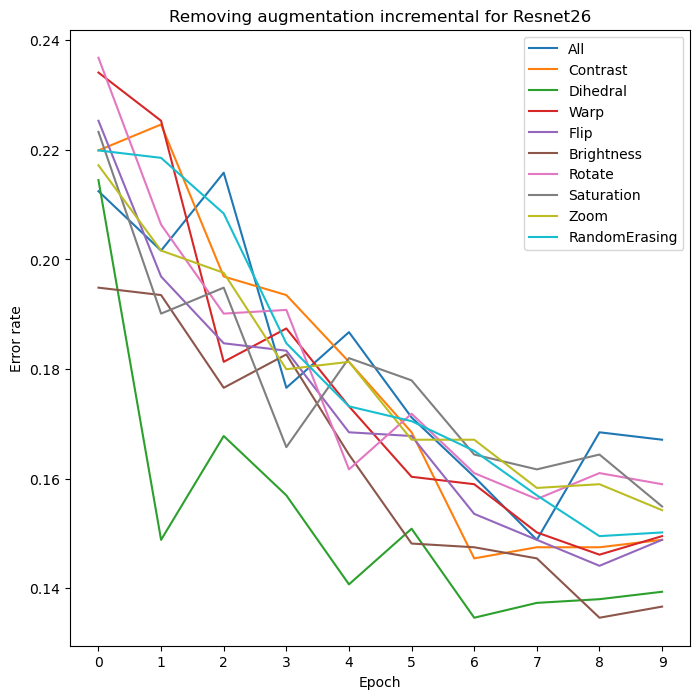

In [8]:
plt.figure(figsize = (8,8))
for i in csv_list:
    plt.plot(i['epoch'], i['error_rate'])
    plt.xticks(i['epoch'])

plt.xlabel("Epoch")

plt.ylabel("Error rate")
plt.legend(['All','Contrast','Dihedral','Warp', 'Flip', 'Brightness', 'Rotate','Saturation','Zoom','RandomErasing'])

plt.title("Removing augmentation incremental for Resnet26")


In [9]:
csv_list = []
for i in range(len(batch_tfms)):
    dls = ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2,
        label_func=pet_label_func, item_tfms=[Resize(128, method='crop')], batch_tfms = batch_tfms[0:len(batch_tfms)])
    
    model = vision_learner(dls, 'resnet18', metrics=error_rate, cbs=CSVLogger())
    model.fine_tune(10)
    csv = model.csv_logger.read_log() 
    csv_list.append(csv)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.305927,1.107231,0.324763,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.258587,0.905556,0.284844,00:45
1,2.175427,0.813522,0.256428,00:45
2,1.844874,0.705975,0.221922,00:44
3,1.739656,0.665914,0.203654,00:45
4,1.648482,0.632601,0.192152,00:45
5,1.495035,0.607337,0.196211,00:45
6,1.529055,0.592715,0.190122,00:44
7,1.336521,0.567182,0.176590,00:44
8,1.310609,0.571088,0.177943,00:45
9,1.344267,0.569136,0.177267,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.289348,0.964083,0.297023,00:45


epoch,train_loss,valid_loss,error_rate,time
0,2.218438,0.810616,0.243572,00:45
1,2.065929,0.709764,0.219892,00:45
2,1.860546,0.654573,0.207037,00:44
3,1.761758,0.642639,0.194858,00:45
4,1.601222,0.616154,0.207037,00:45
5,1.457870,0.580119,0.185386,00:45
6,1.560176,0.525893,0.176590,00:45
7,1.381855,0.523606,0.168471,00:45
8,1.319322,0.524916,0.171177,00:45
9,1.333043,0.510088,0.165765,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.337016,0.967361,0.311231,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.292322,0.799613,0.261164,00:46
1,1.942611,0.713340,0.221922,00:45
2,1.884518,0.707366,0.246279,00:45
3,1.770031,0.648830,0.217185,00:45
4,1.550037,0.616480,0.216509,00:45
5,1.521781,0.593305,0.201624,00:45
6,1.483053,0.570549,0.189445,00:45
7,1.378258,0.552337,0.189445,00:45
8,1.400068,0.543546,0.185386,00:44
9,1.341466,0.547503,0.182003,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.203374,0.961074,0.290257,00:45


epoch,train_loss,valid_loss,error_rate,time
0,2.283661,0.835886,0.265223,00:45
1,2.003480,0.732782,0.232747,00:45
2,1.807250,0.663026,0.210419,00:45
3,1.734621,0.622973,0.202300,00:45
4,1.602200,0.589406,0.192828,00:45
5,1.414551,0.578344,0.191475,00:45
6,1.438893,0.561086,0.186739,00:45
7,1.445274,0.534804,0.174560,00:45
8,1.340017,0.542093,0.174560,00:45
9,1.285215,0.528999,0.170501,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.271712,1.049684,0.306495,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.090894,0.851987,0.259811,00:44
1,2.040924,0.771901,0.242219,00:45
2,1.882496,0.701262,0.221245,00:45
3,1.819395,0.650941,0.206360,00:46
4,1.635803,0.630771,0.212449,00:45
5,1.499420,0.602465,0.189445,00:45
6,1.452216,0.582554,0.198917,00:45
7,1.355045,0.572592,0.186739,00:44
8,1.303981,0.551032,0.174560,00:45
9,1.367509,0.571227,0.182679,00:44


epoch,train_loss,valid_loss,error_rate,time
0,3.358399,1.013570,0.313261,00:45


epoch,train_loss,valid_loss,error_rate,time
0,2.261954,0.809176,0.248309,00:45
1,2.094129,0.727641,0.232070,00:45
2,1.857533,0.629548,0.201624,00:44
3,1.729845,0.603094,0.196211,00:45
4,1.541253,0.599698,0.207037,00:45
5,1.510441,0.561313,0.180650,00:44
6,1.473096,0.545515,0.177267,00:45
7,1.406768,0.545153,0.185386,00:44
8,1.309831,0.540133,0.182679,00:45
9,1.357882,0.538838,0.177267,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.192658,1.033493,0.315291,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.327055,0.861763,0.258457,00:45
1,2.065675,0.781306,0.253045,00:44
2,1.868306,0.762939,0.246279,00:45
3,1.744457,0.735924,0.232747,00:44
4,1.674683,0.667978,0.208390,00:45
5,1.455797,0.623251,0.195535,00:44
6,1.414358,0.608729,0.198241,00:45
7,1.380475,0.605941,0.195535,00:45
8,1.410571,0.594316,0.186062,00:44
9,1.389225,0.606020,0.193505,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.255074,1.067967,0.332882,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.278350,0.869675,0.271313,00:45
1,1.989563,0.755180,0.236806,00:44
2,1.936153,0.723285,0.227334,00:45
3,1.691409,0.641382,0.209743,00:45
4,1.601529,0.628195,0.194858,00:44
5,1.539454,0.602219,0.192152,00:45
6,1.493434,0.591802,0.186739,00:44
7,1.314973,0.570953,0.182679,00:45
8,1.311237,0.557498,0.177267,00:44
9,1.310338,0.547631,0.172530,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.313486,1.048503,0.316644,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.159716,0.851572,0.261164,00:45
1,2.025913,0.758098,0.238160,00:45
2,1.887749,0.706585,0.224628,00:45
3,1.674341,0.660082,0.200947,00:45
4,1.534041,0.606403,0.192152,00:44
5,1.530595,0.603198,0.192828,00:45
6,1.473641,0.613126,0.198917,00:45
7,1.520588,0.585814,0.186062,00:44
8,1.371084,0.570236,0.174560,00:45
9,1.295965,0.559472,0.175237,00:45


epoch,train_loss,valid_loss,error_rate,time
0,3.333172,0.970470,0.296346,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.264629,0.838136,0.253721,00:45
1,2.058445,0.737986,0.233424,00:45
2,1.876587,0.687811,0.223275,00:45
3,1.679735,0.656214,0.207713,00:45
4,1.599615,0.622779,0.205007,00:45
5,1.412698,0.583871,0.186062,00:45
6,1.423533,0.572681,0.189445,00:45
7,1.297436,0.564661,0.187415,00:45
8,1.360207,0.568647,0.188769,00:45
9,1.254526,0.559895,0.183356,00:45


Text(0.5, 1.0, 'Removing augmentation incremental for Resnet18')

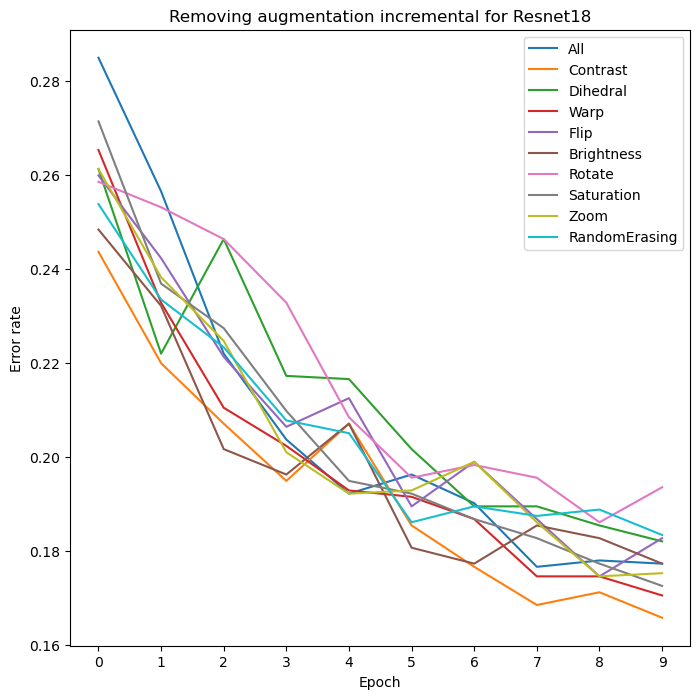

In [10]:
plt.figure(figsize = (8,8))
for i in csv_list:
    plt.plot(i['epoch'], i['error_rate'])
    plt.xticks(i['epoch'])

plt.xlabel("Epoch")

plt.ylabel("Error rate")
plt.legend(['All','Contrast','Dihedral','Warp', 'Flip', 'Brightness', 'Rotate','Saturation','Zoom','RandomErasing'])

plt.title("Removing augmentation incremental for Resnet18")
